# Projeto - Machine Learning I | Santander Coders 2024.2 - DS
_*Pré-processamento e modelagem_

## Problema de Negócios 

Uma fintech gostaria de mapear perfis de bons pagadores a fim de otimizar o processo de concessão de crédito. Nos propomos a resolver este problema de negócios desenvolvendo modelos de aprendizagem de máquina supervisionada para problemas de classificação binária. 

_Obs.: completar com os nomes dos modelos que serão treinados e as métricas de classificação analisadas_

## Dicionário dos dados 

O dataset é da [Kaggle](https://www.kaggle.com/datasets/vikramamin/bank-loan-approval-lr-dt-rf-and-auc/data) e possui 14 colunas e 5000 linhas.

- **ID**: Identificador do cliente.
- **Age** : Idade (em anos).
- **Experience** : Experiência de trabalho (em anos). 
- **Income** : Renda anual (em milhares).
- **ZipCode**: Código postal da residência.
- **Family** : Número de membros da família.
- **CCAvg**: Média do gasto mensal com cartão de crédito (em milhares).
- **Education**: Nível de escolaridade do cliente.
   - 1: Graduação
   - 2: Mestrado
   - 3: Nível Avançado
- **Mortgage**: Valor do financiamento, se existente (em milhares).
- **Securities Account** : Se o cliente tem ou não ativos ou títulos do banco.
- **CD Account** : Se o cliente tem ou não certificado de depósito bancário do banco.
- **Online** : Se o cliente tem ou não acesso a funcionalidades do Internet Banking.
- **Credit Card** : Se o cliente tem ou não cartão de crédito do banco.
- **Personal Loan**: Se o empréstimo pessoal foi ou não aprovado.
  - 0: empréstimo pessoal aprovado
  - 1: empréstimo pessoal não aprovado

## Bibliotecas 

In [21]:
# Manipulação e visualização de dados
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# Pré-processamento de dados 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Classificadores 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Métricas de desempenho 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# import shap

# Controle de warnings 
import warnings
warnings.filterwarnings('ignore')

## Carregando os dados

In [22]:
df_original = pd.read_csv("../../data/external/bankloan.csv")
df = df_original.reset_index(drop=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP.Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal.Loan            2
Securities.Account       2
CD.Account               2
Online                   2
CreditCard               2
dtype: int64

**Observações**
- O dataset não possui colunas com valores nulos.
- Não há identificadores repetidos.
- Algumas variáveis foram classificadas como numéricas, mas os seus valores representam categorias:
  - Education
  - Personal.Loan
  - Securities.Account
  - CD.Account
  - Online
  - CreditCard

## Exploração inicial dos dados 

In [6]:
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Estatísticas descritivas gerais

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP.Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal.Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Observações**

- _Fazer observações sobre as estatísticas descritivas das variáveis_

### Estatísticas descritivas por classes 

In [8]:
sns.set_context('paper')
# sns.set_style('white')
# plt.rcParams['figure.dpi'] = 150

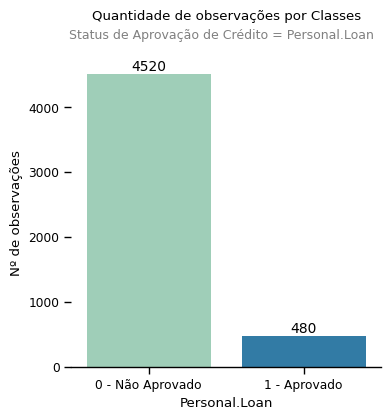

In [9]:
plt.figure(figsize=(4, 4))
plt.title('Quantidade de observações por Classes', y=1.1)
plt.figtext(0.5, 0.93, 'Status de Aprovação de Crédito = Personal.Loan', ha = 'center', color = 'gray', fontsize = 9)

dados_target = df['Personal.Loan'].value_counts()

ax= sns.barplot(data = dados_target, palette = 'YlGnBu')
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.ylabel('Nº de observações')
plt.xticks(ticks=[0, 1], labels=['0 - Não Aprovado', '1 - Aprovado'])
sns.despine(left = True)
plt.show()

In [10]:
df['Personal.Loan'].value_counts(normalize = True)

Personal.Loan
0    0.904
1    0.096
Name: proportion, dtype: float64

- O dataframe tem classes bem desbalanceadas.

In [11]:
colunas = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
           'Securities.Account', 'CD.Account', 'Online', 'CreditCard']

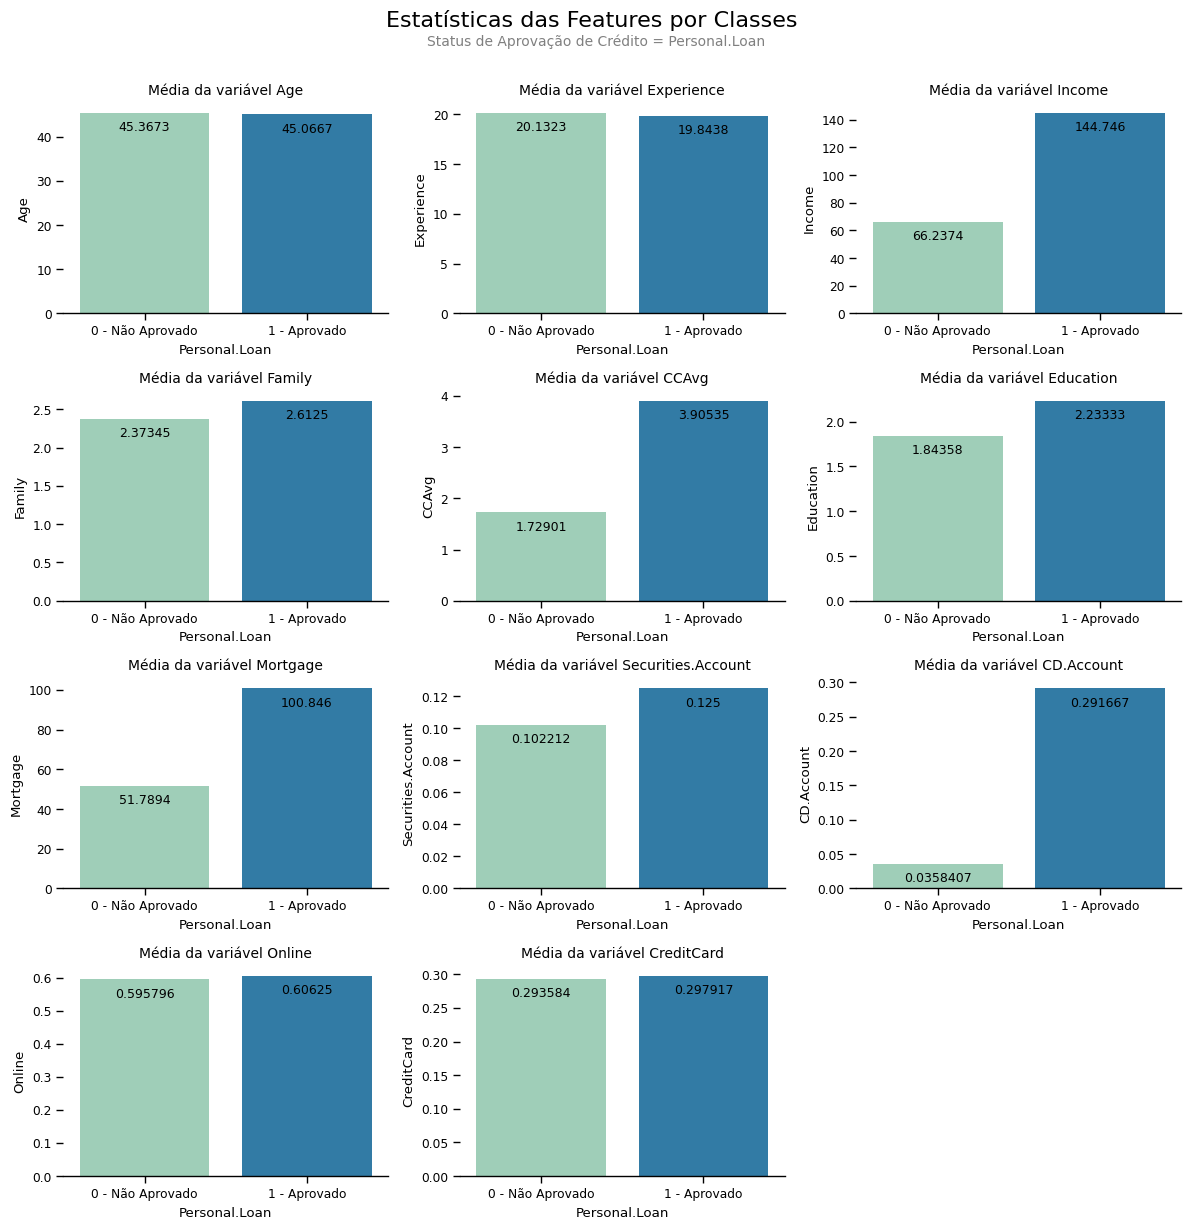

In [12]:
plt.figure(figsize = (12, 12))
plt.suptitle('Estatísticas das Features por Classes ', y=1.02, fontsize=16)
plt.figtext(0.5, 0.99, 'Status de Aprovação de Crédito = Personal.Loan', ha='center', fontsize=10, color='gray')

for i, q in enumerate(colunas, 1):
    plt.subplot(4, 3, i)
    estatisticas_media = df.groupby(['Personal.Loan'])[q].mean().reset_index()
    ax = sns.barplot(data = estatisticas_media, x = 'Personal.Loan', y = q, palette = 'YlGnBu')
    ax.bar_label(ax.containers[0], fontsize=9, padding = -15)
    ax.bar_label(ax.containers[1], fontsize=9, padding = -15)
    sns.despine(left = True)
    plt.xticks(ticks=[0, 1], labels=['0 - Não Aprovado', '1 - Aprovado'])
    plt.title(f'Média da variável {q}', fontsize=10)

plt.tight_layout()
plt.show()

**Observações**

- Income, Family, CCAvg, Education, Mortgage, SecuritiesAccount e CDAccount tem valores médios bem diferentes por classes. Isso sugere que essas variáveis dão maior capacidade discriminativa ao modelo. 

_Obs.: Fazer um histplot para Age, Experience, **Mortgage**, **Income** e **CCAvg**._

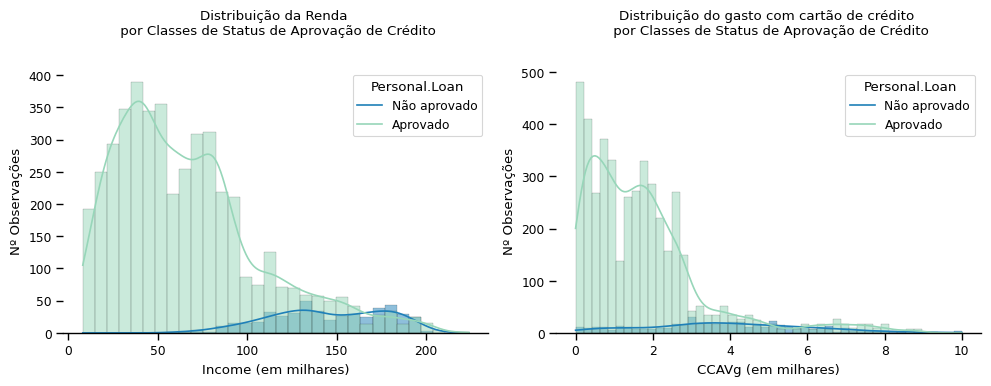

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(data=df, x="Income", hue="Personal.Loan", palette = 'YlGnBu', 
             kde = True, linewidth = .1, ax = ax[0], edgecolor = 'black')

ax[0].set_title('Distribuição da Renda \n por Classes de Status de Aprovação de Crédito', y = 1.1)
ax[0].set_ylabel('Nº Observações')
ax[0].set_xlabel('Income (em milhares)')
ax[0].legend(title="Personal.Loan", labels=['Não aprovado', 'Aprovado'])
ax[0].grid(axis = 'y', alpha = 0)
ax[0].grid(axis = 'x', alpha = 0)

sns.histplot(data=df, x="CCAvg", hue="Personal.Loan", palette = 'YlGnBu', 
             kde = True, linewidth = .1, ax = ax[1], edgecolor = 'black')

ax[1].set_title('Distribuição do gasto com cartão de crédito \n por Classes de Status de Aprovação de Crédito', y = 1.1)
ax[1].set_ylabel('Nº Observações')
ax[1].set_xlabel('CCAVg (em milhares)')
ax[1].legend(title="Personal.Loan", labels=['Não aprovado', 'Aprovado'])
ax[1].grid(axis = 'y', alpha = 0)
ax[1].grid(axis = 'x', alpha = 0)

sns.despine(left = True)
plt.tight_layout()
plt.show()

### Correlações 

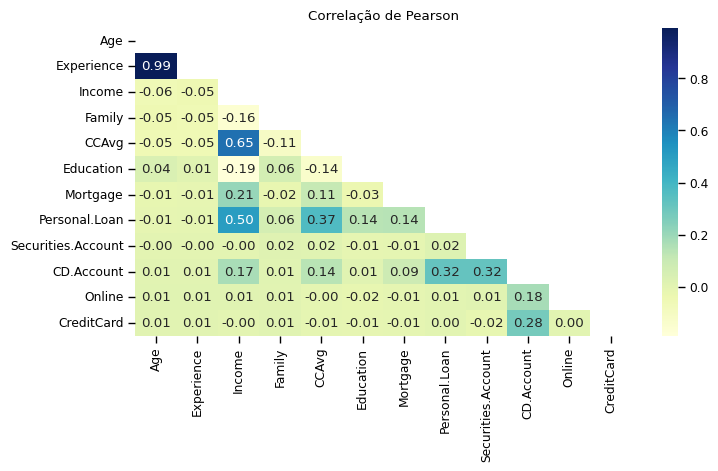

In [14]:
plt.figure(figsize=(8, 4)) 

dados = df.drop(columns = ['ID', 'ZIP.Code'], axis =1)
correlation_matrix = dados.corr(method='pearson')
mask = np.triu(np.ones_like(correlation_matrix))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', 
            mask=mask, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)

plt.title("Correlação de Pearson")
plt.show()

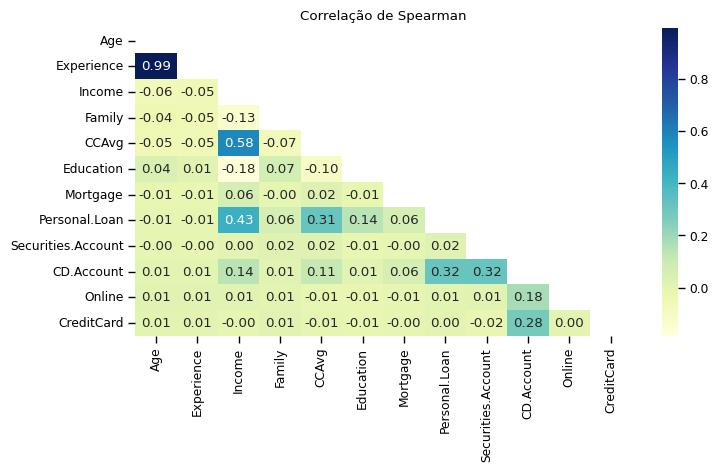

In [15]:
plt.figure(figsize=(8, 4)) 

dados = df.drop(columns = ['ID', 'ZIP.Code'], axis =1)
correlation_matrix = dados.corr(method='spearman')
mask = np.triu(np.ones_like(correlation_matrix))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', 
            mask=mask, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)

plt.title("Correlação de Spearman")
plt.show()

**Observações**

Pelo gráfico de correlação de spearman, percebe-se que:
- As variáveis Experience e Age são forte e positivamente correlacionadas. Isso é totalmente esperado dado que os anos de experiência no mercado de trabalho aumentam a medida que envelhecemos. 
- As variáveis CCAvg e Income têm correlação positiva e considerável. Isso faz sentido porque é normalmente esperado que o os gastos mensais aumentem a medida que a renda cresce.
- A variável Personal.Loan é positivamente correlacionada com Income, CCAvg e Education. Isso nos sugere que as variáveis de renda anual, média de consumo e nível educacional pode exeplicar melhor a probabilidade de aprovação do empréstimo comparado às outras variáveis.
- A correlação entre as variáveis Education e Income é negativa. Apesar de fraca, é minimamente curioso níveis de escolaridade mais altos estarem associados a uma renda mais baixa.
- _Obs.: As correlações das variáveis Family também são curiosas/Comentar depois._

**Aviso**

Apesar dos gráficos de correlação pelos métodos de Pearson e Spearman apresentarem padrões semelhantes, a correlação de pearson não é tão adequada para avaliar a correlação entre variáveis categóricas e numéricas. _(explicar o porquê)_

### Outliers

In [16]:
colunas_num_continuas = ['Age', 'Experience', 'Income', 'CCAvg']

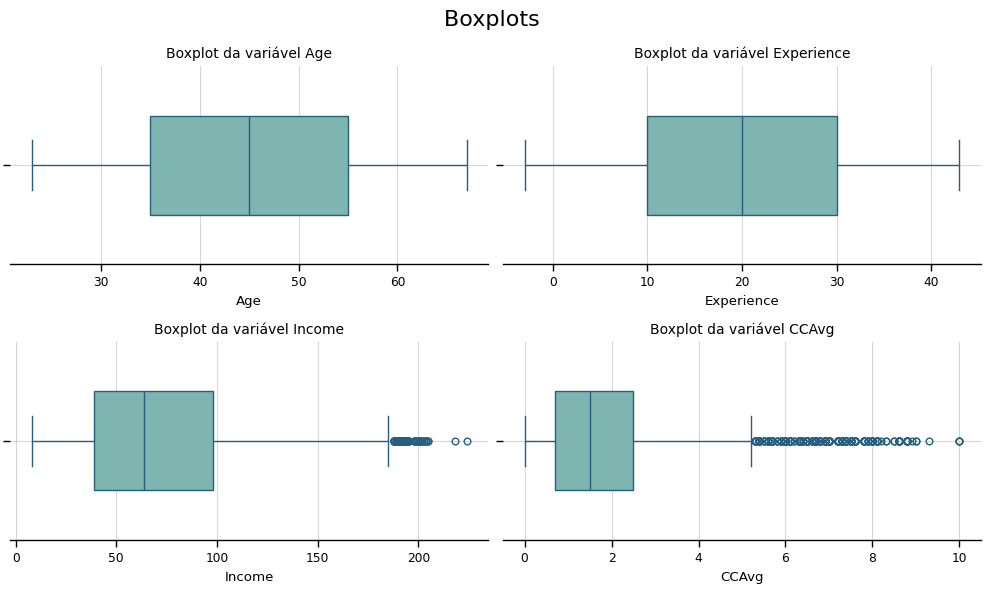

In [17]:
plt.figure(figsize = (10, 6))
plt.suptitle('Boxplots ', fontsize=16)

for i, q in enumerate(colunas_num_continuas, 1):
    paleta = sns.color_palette('YlGnBu_d')
    plt.subplot(2, 2, i)
    ax = sns.boxplot(data = df[q], color = paleta[0], linecolor = paleta[4], orient='h', width=0.5)
    sns.despine(left = True)
    plt.title(f'Boxplot da variável {q}', fontsize=10)
    plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()

## Pré-processamento 

**Substituir valores por categorias**

_*continuar anotações_

**Divisão do treino e teste**
- Escolhemos a divisão estratificada na proporção 20/80 porque as classes estão bem desbalanceadas. Um conjunto de treino maior (80%) garante que o modelo tenha mais insumos para aprender padrões relacionados a classe minoritária (classe 1) do alvo.

_*continuar anotações_

**Variáveis binárias**
- As variáveis 'Personal.Loan', 'Securities.Account',  'CD.Account', 'Online', 'CreditCard são categóricas binárias, portanto, já estão codificadas e não precisarão receber transformação do tipo LabelEncoder ou OneHotEncoder.
```python
df.nunique()[df.nunique() <= 2]

Personal.Loan         2
Securities.Account    2
CD.Account            2
Online                2
CreditCard            2
dtint64pe: int64ype: 

_*continuar anotações_

**Por que o RobustScaler?**

_*continuar anotações_

**Não teve imputação porque não há valores nulos**

_*continuar anotações_

In [18]:
# Modificação na variável categórica de educação
df['Education'] = df['Education'].replace({1: 'Graduacao', 2: 'Mestrado', 3: 'Nível Avançado'})

In [19]:
X = df.drop(columns = ['ID', 'ZIP.Code', 'Personal.Loan'], axis = 1)
y = df[['Personal.Loan']]

In [20]:
X

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49,4,1.6,Graduacao,0,1,0,0,0
1,45,19,34,3,1.5,Graduacao,0,1,0,0,0
2,39,15,11,1,1.0,Graduacao,0,0,0,0,0
3,35,9,100,1,2.7,Mestrado,0,0,0,0,0
4,35,8,45,4,1.0,Mestrado,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,Nível Avançado,0,0,0,1,0
4996,30,4,15,4,0.4,Graduacao,85,0,0,1,0
4997,63,39,24,2,0.3,Nível Avançado,0,0,0,0,0
4998,65,40,49,3,0.5,Mestrado,0,0,0,1,0


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=42)

In [70]:
print(f'y_train - Proporção da classe 0: {y_train.value_counts(normalize=True)[0]}')
print(f'y_train - Proporção da classe 1: {y_train.value_counts(normalize=True)[1]}')
print(f'y_test - Proporção da classe 0: {y_train.value_counts(normalize=True)[0]}')
print(f'y_test - Proporção da classe 1: {y_train.value_counts(normalize=True)[1]}')

y_train - Proporção da classe 0: 0.904
y_train - Proporção da classe 1: 0.096
y_test - Proporção da classe 0: 0.904
y_test - Proporção da classe 1: 0.096


In [54]:
numerical_features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
categorical_features = ['Education']

In [55]:
numerical_transformer = Pipeline(steps = [('scaler', RobustScaler())])
categorical_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

In [56]:
preprocessor = ColumnTransformer(transformers = [
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

In [57]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

## Modelagem e Análise de desempenho 

**Modelos testados**
- [LogisticRegression](https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [AdaBoostClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)
- [RandomForestClassifier (Esemble Bagging)](https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [XGBoost (Esemble Boosting)](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier:~:text=object-,class,%EF%83%81,-Bases%3A%20XGBModel%2C%20Classifier)

**Métricas de desempenho**
- Accuracy
- **Precision**
- Recall/Sensibilidade
- Recall/Especificity
- **F1-Score**
- AUC-ROC

_*continuar anotações sobre a descrição de cada métrica e o porquê duas delas serão escolhidas como principais._

Obs.: Podemos encontrar mais informações dos modelos nesta [página do DataCamp.](https://www.datacamp.com/blog/classification-machine-learning)

### Experimento 00 - Geral*
_*Com hiperparâmetros de todos os modelos em default._

LogisticRegression 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       904
           1       0.83      0.70      0.76        96

    accuracy                           0.96      1000
   macro avg       0.90      0.84      0.87      1000
weighted avg       0.95      0.96      0.96      1000

ROC AUC score: 0.9551


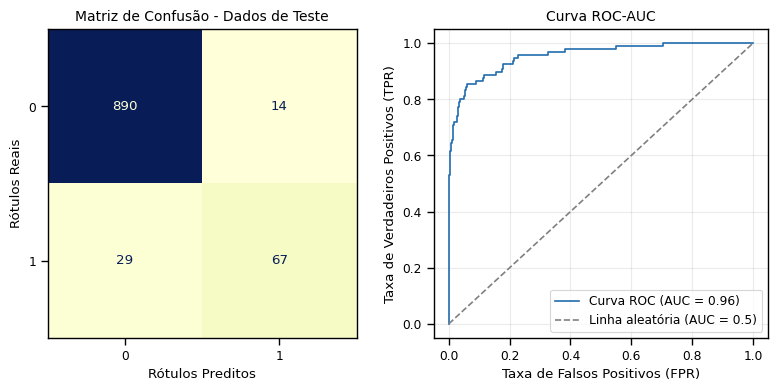

DecisionTree 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       904
           1       0.91      0.96      0.93        96

    accuracy                           0.99      1000
   macro avg       0.95      0.97      0.96      1000
weighted avg       0.99      0.99      0.99      1000

ROC AUC score: 0.9742


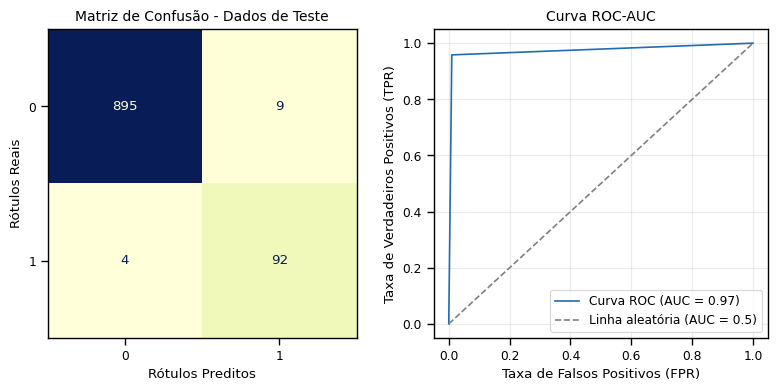

KNN 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       904
           1       0.97      0.69      0.80        96

    accuracy                           0.97      1000
   macro avg       0.97      0.84      0.89      1000
weighted avg       0.97      0.97      0.97      1000

ROC AUC score: 0.9479


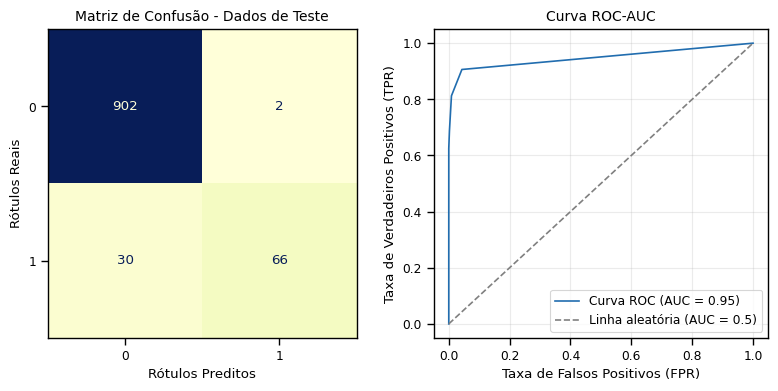

AdaBoost 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       904
           1       0.84      0.83      0.84        96

    accuracy                           0.97      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.97      0.97      0.97      1000

ROC AUC score: 0.9848


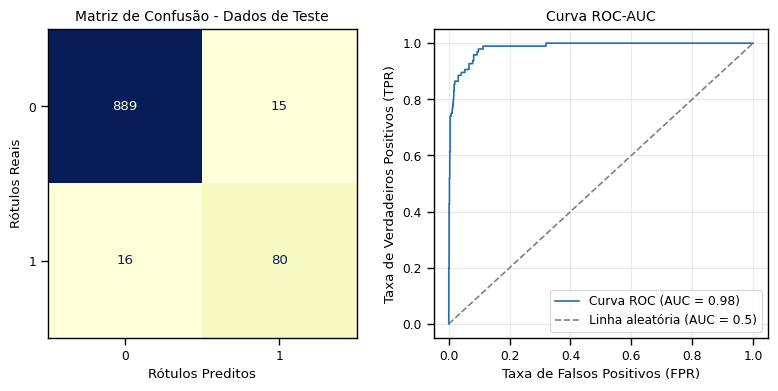

RandomForest 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       904
           1       0.96      0.96      0.96        96

    accuracy                           0.99      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.99      0.99      0.99      1000

ROC AUC score: 0.9985


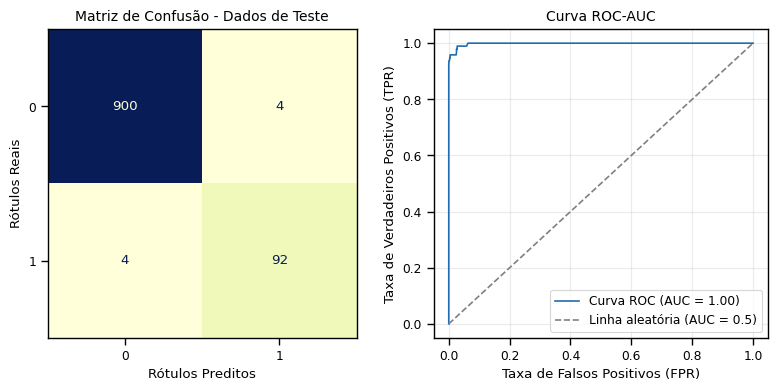

XGBoost 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.95      0.94      0.94        96

    accuracy                           0.99      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.99      0.99      0.99      1000

ROC AUC score: 0.9989


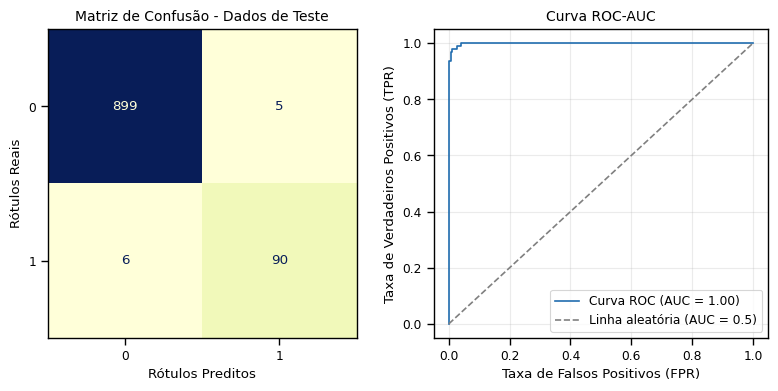

In [58]:
paleta = sns.color_palette("YlGnBu",)

models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42), 
    'KNN': KNeighborsClassifier(), 
    'AdaBoost': AdaBoostClassifier(random_state=42), 
    'RandomForest': RandomForestClassifier(random_state=42), 
    'XGBoost': xgb.XGBClassifier(random_state=42) 
}

for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  

    print(f'{model_name} \n{classification_report(y_test, y_pred)}')
    print(f'ROC AUC score: {roc_auc_score(y_test, y_pred_proba):.4f}')

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))

    cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='YlGnBu', colorbar=False, ax=ax[0])
    ax[0].set_title('Matriz de Confusão - Dados de Teste', fontsize=10)
    ax[0].set_xlabel('Rótulos Preditos')
    ax[0].set_ylabel('Rótulos Reais')

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    ax[1].set_title('Curva ROC-AUC', fontsize=10)
    ax[1].plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})', color=paleta[4])
    ax[1].plot([0, 1], [0, 1], 'k--', label='Linha aleatória (AUC = 0.5)', color = 'gray')
    ax[1].set_xlabel('Taxa de Falsos Positivos (FPR)')
    ax[1].set_ylabel('Taxa de Verdadeiros Positivos (TPR)')
    ax[1].legend(loc='lower right')
    ax[1].grid(alpha =.25)

    plt.tight_layout()
    plt.show()

### Resumo de métricas

In [59]:
models = {
    'LogisticRgression': LogisticRegression(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42), 
    'KNN': KNeighborsClassifier(), 
    'AdaBoost': AdaBoostClassifier(random_state=42), 
    'RandomForest': RandomForestClassifier(random_state=42), 
    'XGBoost': xgb.XGBClassifier(random_state=42) 
}

resumo_metricas = []

for model_name, model in models.items():
    pipeline = Pipeline(steps=[
    ('classifier', model)])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    resumo_metricas.append({
        'Modelo': model_name,
        'Precisão': precision_score(y_test, y_pred),
        'Acurácia': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'f1-score (weighted)': f1_score(y_test, y_pred, average = "weighted"),
        'f1-score (macro avg)': f1_score(y_test, y_pred, average = "macro")
    })

In [60]:
resumo_metricas_df = pd.DataFrame(resumo_metricas)
resumo_metricas_df.sort_values(by = 'f1-score (macro avg)', ascending = False)

,Modelo,Precisão,Acurácia,Recall,f1-score (weighted),f1-score (macro avg)
4,RandomForest,0.958333,0.992,0.958333,0.992000,0.976954
5,XGBoost,0.947368,0.989,0.937500,0.988974,0.968164
1,DecisionTree,0.910891,0.987,0.958333,0.987147,0.963400
3,AdaBoost,0.842105,0.969,0.833333,0.968927,0.910280
2,KNN,0.970588,0.968,0.687500,0.965512,0.893724
0,LogisticRgression,0.827160,0.957,0.697917,0.955355,0.866737


**Observações**
- As acurácias dos modelos são muito próximas.
- As métricas que consideraremos em um modelo de classificação binária é f1-score e precisão porque o custo de falso positivo e um falso negativo são muito grandes, dado que um falso positivo poderia trazer prejuízo ao banco ao conceder crédito para um eventual mau pagador e um falso negativo, o cliente perderia um eventual cliente lucrativo. Nesses casos, o **Random Forest** e o **XGBoost** se destacam como os melhores modelos.

## Otimização de Hiperparâmetros*
*_Busca em grade e validação cruzada._

### Experimento 01 - Random Forest

In [28]:
modelo_rf = Pipeline(steps=[
    ('classifier', RandomForestClassifier(random_state = 42))
])

param_grid = {
    'classifier__max_depth': [10, 30, None],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__class_weight': ['balanced', None]
}

grid_search_rf = GridSearchCV(modelo_rf, param_grid, cv=5, scoring='precision', return_train_score=True)
grid_search_rf.fit(X_train, y_train)
best_model_rf = grid_search_rf.best_estimator_

In [29]:
print(f'A melhor combinação de parâmetros encontrada é: \n {grid_search_rf.best_params_}')
print(f'O melhor score de validação cruzada é: {grid_search_rf.best_score_:.6f}')

A melhor combinação de parâmetros encontrada é: 
 {'classifier__class_weight': None, 'classifier__max_depth': 30, 'classifier__max_features': 'sqrt'}
O melhor score de validação cruzada é: 0.974846


In [30]:
y_pred = best_model_rf.predict(X_test)
y_pred_proba = best_model_rf.predict_proba(X_test)[:, 1]

print(f'RandomForestClassifier \n {classification_report(y_test, y_pred)}')
print(f'roc auc score: {roc_auc_score(y_test, y_pred):.4f}')
print(f'precision_score: {precision_score(y_test, y_pred):.4f}')
print(f'accuracy_score: {accuracy_score(y_test, y_pred):.4f}')
print(f'recall_score: {recall_score(y_test, y_pred):.4f}')
print(f'f1_score macro: {f1_score(y_test, y_pred, average = "macro"):.4f}')
print(f'f1_score wighted: {f1_score(y_test, y_pred, average = "weighted"):.4f}')

RandomForestClassifier 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       904
           1       0.96      0.96      0.96        96

    accuracy                           0.99      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.99      0.99      0.99      1000

roc auc score: 0.9770
precision_score: 0.9583
accuracy_score: 0.9920
recall_score: 0.9583
f1_score macro: 0.9770
f1_score wighted: 0.9920


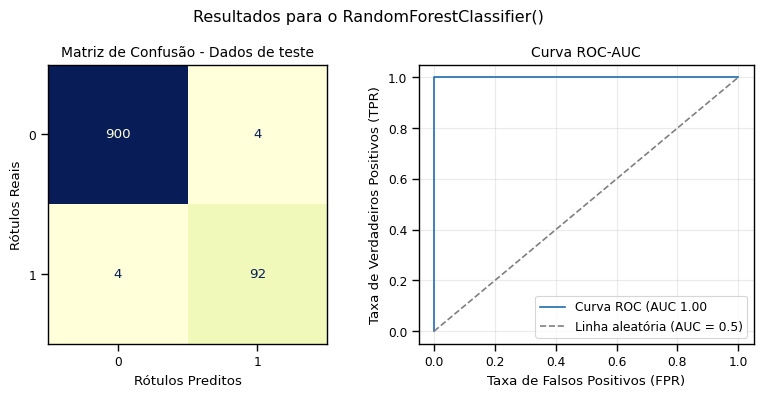

In [31]:
fig, ax = plt.subplots(1, 2, figsize = (8, 4))
plt.suptitle('Resultados para o RandomForestClassifier()')

cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='YlGnBu', colorbar=False, ax = ax[0])
ax[0].set_title('Matriz de Confusão - Dados de teste', fontsize = 10)
ax[0].set_xlabel('Rótulos Preditos')
ax[0].set_ylabel('Rótulos Reais')

fpr, tpr, _ = roc_curve(y_pred, y_pred_proba)
roc_auc = roc_auc_score(y_pred, y_pred_proba)
ax[1].plot(fpr, tpr, label = f'Curva ROC (AUC {roc_auc:.2f}', color = paleta[4])
ax[1].plot([0, 1], [0, 1], 'k--', label='Linha aleatória (AUC = 0.5)', color = 'gray')
ax[1].set_title('Curva ROC-AUC', fontsize=10)
ax[1].set_xlabel('Taxa de Falsos Positivos (FPR)')
ax[1].set_ylabel('Taxa de Verdadeiros Positivos (TPR)')
ax[1].legend(loc = 'lower right')
ax[1].grid(alpha = .25)

plt.tight_layout()
plt.show()

### Experimento 01 - Importância das variáveis 

In [32]:
ohe = preprocessor.transformers_[1][1]  
categorical_columns = ohe.get_feature_names_out(input_features=categorical_features)
list(categorical_columns)

['Education_Graduacao', 'Education_Mestrado', 'Education_Nível Avançado']

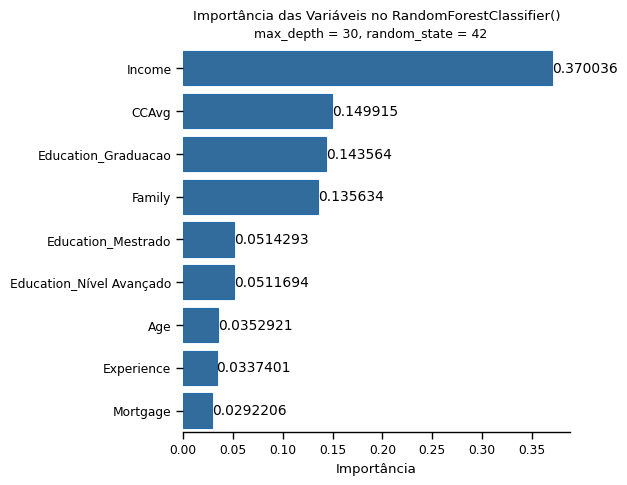

In [33]:
importances_rf = best_model_rf.named_steps['classifier'].feature_importances_
all_columns = numerical_features + list(categorical_columns)  

importance_rf_df = pd.DataFrame({
    'Feature': all_columns,
    'Importance': importances_rf
})

importance_rf_df = importance_rf_df.sort_values(by='Importance', ascending=True)
plt.figure(figsize=(5, 5))
paleta = sns.color_palette('YlGnBu')
ax = sns.barplot(data = importance_rf_df, y = importance_rf_df['Feature'], x = importance_rf_df['Importance'], 
                 color = paleta[4], edgecolor = paleta[4])
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Importância')
plt.ylabel('')
plt.title('Importância das Variáveis no RandomForestClassifier()', y = 1.05)
plt.figtext(0.5, 0.9, 'max_depth = 30, random_state = 42', ha='center', color = 'black', fontsize=9)
plt.gca().invert_yaxis() 
sns.despine(left=True)
plt.show()

### Experimento 01 - Shap Values

In [106]:
# classifier = best_model_rf.named_steps['classifier']
# explainer_rf = shap.TreeExplainer(classifier)
# shap_values_rf = explainer_rf.shap_values(X_test)

In [ ]:
# print("Forma de shap_values[1]:", shap_values_rf.shape)
# print("Forma de X_test_transformed:", X_test.shape)

In [ ]:
# # Remova a última coluna de shap_values[1] se houver uma discrepância
# if shap_values_rf[1].shape[1] == X_test.shape[1] + 1:
#     shap_values_rf[1] = shap_value_rfs[1][:, :-1]

# Visualize os SHAP values para a classe positiva (1)
# shap.summary_plot(shap_values_rf[::-1], X_test)  # 1 para a classe positiva

### Experimento 02 - XGBoost

In [28]:
modelo_xgb = Pipeline(steps=[
    ('classifier', xgb.XGBClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 6, 8]
    # 'classifier__min_child_weight': [1, 2, 5],
    # 'classifier__subsample': [0.8, 1.0],
    # 'classifier__colsample_bytree': [0.8, 1.0],
    # 'classifier__gamma': [0, 0.1, 0.2],
    # 'classifier__reg_alpha': [0, 0.1, 0.5],
    # 'classifier__reg_lambda': [0.1, 1, 10]
}

grid_search_xgb = GridSearchCV(modelo_xgb, param_grid, cv=5, scoring='precision', return_train_score=True)
grid_search_xgb.fit(X_train, y_train)
best_model_xgb = grid_search_xgb.best_estimator_

In [29]:
print(f'A melhor combinação de parâmetros encontrada é: \n {grid_search_xgb.best_params_}')
print(f'O melhor score de validação cruzada é: {grid_search_xgb.best_score_:.6f}')

A melhor combinação de parâmetros encontrada é: 
 {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
O melhor score de validação cruzada é: 0.830080


In [36]:
y_pred = best_model_xgb.predict(X_test)
y_pred_proba = best_model_xgb.predict_proba(X_test)[:, 1]

print(f'XGBClassifier \n {classification_report(y_test, y_pred)}')

print('Resumo das Métricas: \n')
print(f'roc auc score: {roc_auc_score(y_test, y_pred):.4f}')
print(f'precision_score: {precision_score(y_test, y_pred):.4f}')
print(f'accuracy_score: {accuracy_score(y_test, y_pred):.4f}')
print(f'recall_score: {recall_score(y_test, y_pred):.4f}')
print(f'f1_score macro: {f1_score(y_test, y_pred, average = "macro"):.4f}')
print(f'f1_score wighted: {f1_score(y_test, y_pred, average = "weighted"):.4f}')

XGBClassifier 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       904
           1       0.98      0.95      0.96        96

    accuracy                           0.99      1000
   macro avg       0.99      0.97      0.98      1000
weighted avg       0.99      0.99      0.99      1000

Resumo das Métricas: 

roc auc score: 0.9729
precision_score: 0.9785
accuracy_score: 0.9930
recall_score: 0.9479
f1_score macro: 0.9795
f1_score wighted: 0.9930


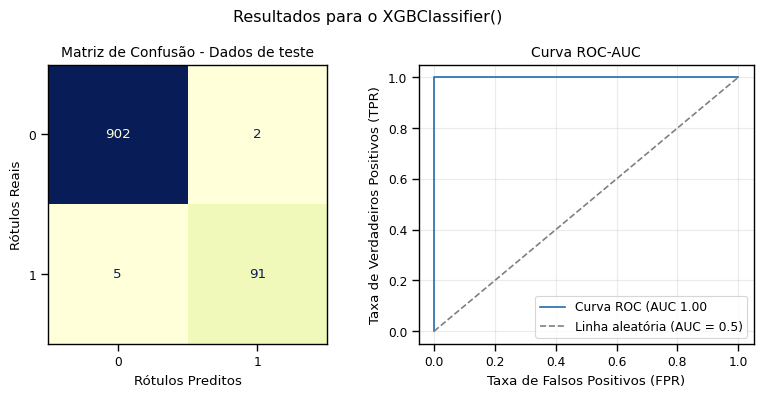

In [37]:
fig, ax = plt.subplots(1, 2, figsize = (8, 4))
plt.suptitle('Resultados para o XGBClassifier()')

cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='YlGnBu', colorbar=False, ax = ax[0])
ax[0].set_title('Matriz de Confusão - Dados de teste', fontsize = 10)
ax[0].set_xlabel('Rótulos Preditos')
ax[0].set_ylabel('Rótulos Reais')

fpr, tpr, _ = roc_curve(y_pred, y_pred_proba)
roc_auc = roc_auc_score(y_pred, y_pred_proba)

ax[1].plot(fpr, tpr, label = f'Curva ROC (AUC {roc_auc:.2f}', color = paleta[4])
ax[1].plot([0, 1], [0, 1], 'k--', label='Linha aleatória (AUC = 0.5)', color = 'gray')
ax[1].set_title('Curva ROC-AUC', fontsize=10)
ax[1].set_xlabel('Taxa de Falsos Positivos (FPR)')
ax[1].set_ylabel('Taxa de Verdadeiros Positivos (TPR)')
ax[1].legend(loc = 'lower right')
ax[1].grid(alpha = .25)

plt.tight_layout()
plt.show()

### Experimento 02 - Importância das variáveis

In [23]:
data = pd.read_csv('../../data/preprocessed/preprocessed_data.csv')

features = ['cat__age_bracket_name_Baby boomers','cat__age_bracket_name_Generation X',
            'cat__age_bracket_name_Generation Z','cat__age_bracket_name_Millennials',
            'cat__education_ensino_medio', 'cat__education_ensino_superior',
            'cat__education_pos_graduacao', 'cat__securities_account_0',
            'cat__securities_account_1','cat__cd_account_0','cat__cd_account_1',
            'cat__online_0','cat__online_1']

X, y = data[features], data['credit_card']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42
)

In [38]:
ohe = preprocessor.transformers_[1][1] 
categorical_columns = ohe.get_feature_names_out(input_features=categorical_features)
list(categorical_columns)

['Education_Graduacao', 'Education_Mestrado', 'Education_Nível Avançado']

In [24]:
importances_xgb = best_model_xgb.named_steps['classifier'].feature_importances_
all_columns = numerical_features + list(categorical_columns)  

importance_xgb_df = pd.DataFrame({
    'Feature': all_columns,
    'Importance': importances_xgb
})

importance_xgb_df = importance_xgb_df.sort_values(by='Importance', ascending=True)
plt.figure(figsize=(5, 5))
paleta = sns.color_palette('YlGnBu')
ax = sns.barplot(data = importance_xgb_df, y = importance_xgb_df['Feature'], x = importance_xgb_df['Importance'], 
                 color = paleta[5], edgecolor = paleta[5])
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Importância')
plt.ylabel('')
plt.title('Importância das Variáveis no XGBClassifier()', y = 1.05)
plt.figtext(0.5, 0.9, 'colsample_bytree: 1.0, gamma: 0, reg_alpha:0.5, reg_lambda:10, random_state = 42', 
            ha='center', color = 'black', fontsize=9)

plt.gca().invert_yaxis() 
sns.despine(left=True)
plt.show()

NameError: name 'best_model_xgb' is not defined

### Resumo de métricas

_CALCULAR AS MÉTRICAS E COLOCAR EM UM DATAFRAME PARA PARA JUNTAR E COMPARAR COM O EXPERIMENTO GERAL_

## Apêndice 

### Experiemnto Extra - Random Forest com features selecionadas 

- Retirar as variáveis com pouca importância pode não ter um impacto significativo no modelo, mas retirá-las torna mais simples e interpretável. Os critérios para seleção das variáveis são aquelas com importância superior a 0.01.
- Da correlação, percebemos que **_Experience_** e **_Age_** são variáveis altamente correlacionadas. Por isso, além das variáveis **_CD.Account_** e **Education**, a variável **_Age_** também será eliminada.

In [71]:
X_train

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account,Online,CreditCard
408,60,36,89,2,2.8,Graduacao,0,0,0,1,0
3737,44,19,30,1,0.5,Nível Avançado,0,0,0,1,0
3889,26,0,19,1,0.1,Mestrado,121,0,0,1,0
568,34,9,41,2,0.1,Graduacao,161,0,0,1,1
1041,56,32,51,4,1.5,Graduacao,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4587,37,11,59,4,0.2,Nível Avançado,0,0,0,0,0
2341,36,10,91,1,1.5,Nível Avançado,289,0,0,1,0
1585,57,31,131,2,2.7,Graduacao,0,0,0,0,0
3152,40,15,83,1,1.0,Nível Avançado,0,0,0,0,0


In [77]:
X_train_selected = X_train.drop(columns = ['Age', 'CD.Account', 'Education'], axis = 1)
X_test_selected = X_test.drop(columns = ['Age', 'CD.Account', 'Education'], axis = 1)

In [78]:
numerical_features = ['Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
numerical_transformer = Pipeline(steps = [('scaler', RobustScaler())])

In [79]:
preprocessor = ColumnTransformer(transformers = [
    ('num', numerical_transformer, numerical_features)])

In [80]:
modelo_selected = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state = 42))
])

param_grid = {
    'classifier__max_depth': [10, 30, None],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__class_weight': ['balanced', None]
}

grid_search = GridSearchCV(modelo_selected, param_grid, cv=5, scoring='precision', return_train_score=True)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

In [81]:
print(f'A melhor combinação de parâmetros encontrada é: \n {grid_search.best_params_}')
print(f'O melhor score de validação cruzada é: {grid_search.best_score_:.6f}')

A melhor combinação de parâmetros encontrada é: 
 {'classifier__class_weight': None, 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt'}
O melhor score de validação cruzada é: 0.942907


In [82]:
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print(f'RandomForestClassifier \n {classification_report(y_test, y_pred)}')
print(f'roc auc score: {roc_auc_score(y_test, y_pred):.4f}')

print(f'RandomForestClassifier \n {classification_report(y_test, y_pred)}')
print(f'roc auc score: {roc_auc_score(y_test, y_pred):.3f}')
print(f'precision_score: {precision_score(y_test, y_pred):.3f}')
print(f'accuracy_score: {accuracy_score(y_test, y_pred):.3f}')
print(f'recall_score: {recall_score(y_test, y_pred):.3f}')
print(f'f1_score macro: {f1_score(y_test, y_pred, average = "macro"):.3f}')
print(f'f1_score wighted: {f1_score(y_test, y_pred, average = "weighted"):.3f}')

RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       904
           1       0.97      0.64      0.77        96

    accuracy                           0.96      1000
   macro avg       0.97      0.82      0.87      1000
weighted avg       0.96      0.96      0.96      1000

roc auc score: 0.8166
RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       904
           1       0.97      0.64      0.77        96

    accuracy                           0.96      1000
   macro avg       0.97      0.82      0.87      1000
weighted avg       0.96      0.96      0.96      1000

roc auc score: 0.817
precision_score: 0.968
accuracy_score: 0.963
recall_score: 0.635
f1_score macro: 0.874
f1_score wighted: 0.959


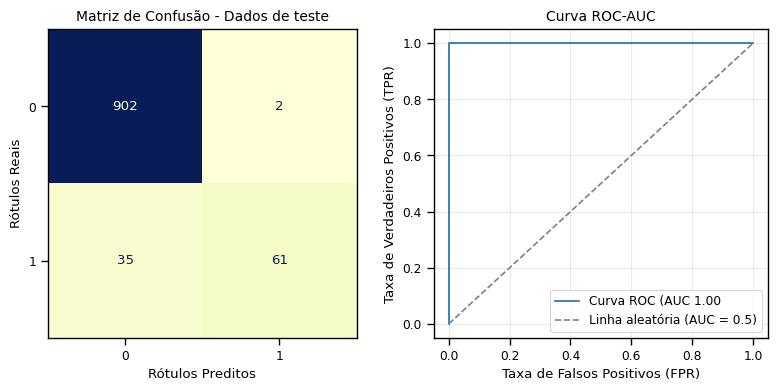

In [83]:
fig, ax = plt.subplots(1, 2, figsize = (8, 4))

cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='YlGnBu', colorbar=False, ax = ax[0])
ax[0].set_title('Matriz de Confusão - Dados de teste', fontsize = 10)
ax[0].set_xlabel('Rótulos Preditos')
ax[0].set_ylabel('Rótulos Reais')

fpr, tpr, _ = roc_curve(y_pred, y_pred_proba)
roc_auc = roc_auc_score(y_pred, y_pred_proba)

ax[1].plot(fpr, tpr, label = f'Curva ROC (AUC {roc_auc:.2f}', color = paleta[4])
ax[1].plot([0, 1], [0, 1], 'k--', label='Linha aleatória (AUC = 0.5)', color = 'gray')
ax[1].set_title('Curva ROC-AUC', fontsize=10)
ax[1].set_xlabel('Taxa de Falsos Positivos (FPR)')
ax[1].set_ylabel('Taxa de Verdadeiros Positivos (TPR)')
ax[1].legend(loc = 'lower right')
ax[1].grid(alpha = .25)

plt.tight_layout()
plt.show()

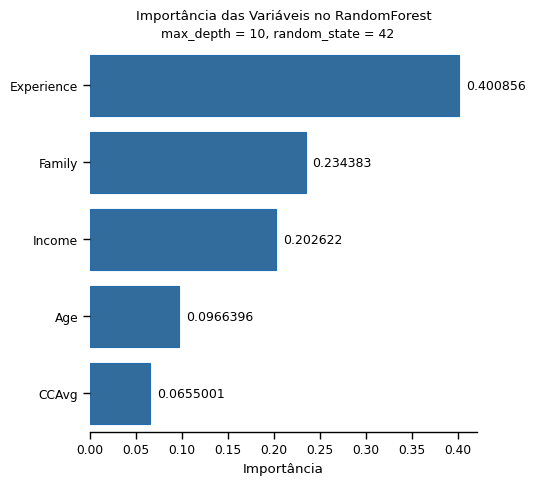

In [84]:
importancias = best_model.named_steps['classifier'].feature_importances_
indices = importancias.argsort()[::-1]

plt.figure(figsize=(5, 5))

paleta = sns.color_palette('YlGnBu')
ax = sns.barplot(x=importancias[indices], y=X_train.columns[indices], color = paleta[4], edgecolor = paleta[4])
ax.bar_label(ax.containers[0], fontsize=9, padding = 5, color = 'black')
plt.title('Importância das Variáveis no RandomForest', y =1.05)
plt.figtext(0.5, 0.9, 'max_depth = 10, random_state = 42', ha='center', color = 'black', fontsize=9)
plt.xlabel('Importância')
plt.ylabel('')

sns.despine(left=True)
plt.show()